# Model evaluation
I want to find out which model is the best for my data. For this I will check different models and compare them with each other.

## Import of required libraries
Those libraries are used in the notebook to perform the data preparation. Maybee you need to install them first with `pip install <library>`.  

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')
import string
string.punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Dataset
As first step I will import the cleaned dataset from the previous notebook "01_data_prep".

In [2]:
new_data = pd.read_csv('../Machine_Learning2_Project/20_model_evaluation/20_cleaned_data.csv')

To prepare the data for the train and test split. X will contain the values of "news" and y will contain the values of "real/fake".

In [3]:
x = new_data['news']
y = new_data['real/fake']

## Train test split
I want to use 30% of the data for testing and 70% for training. With "random_state" I can ensure that the split is always the same and can be reproduced.

In [4]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

The code print('Training:', X_train.shape) outputs the number of rows and columns of the training data set X_train, while the code print('Testing:', X_test.shape) outputs the number of rows and columns of the testing data set X_test. These should be in the ratio 30% to 70%. These outputs help to understand the size of the training and testing datasets and ensure that the split has been done correctly.

In [5]:
print('Training:',X_train.shape)
print('Testing:',X_test.shape)

Training: (27373,)
Testing: (11732,)


In [6]:
print('Training:',y_train.shape)
print('Testing:',y_test.shape)

Training: (27373,)
Testing: (11732,)


## Tfidf_Vectorizer
For the model evaluation, I use the TfidfVectorizer class from the Scikit-learn library to convert text data into numerical feature vectors. Tfidf stands for "Term Frequency-Inverse Document Frequency" and is a technique for weighting words in a text corpus.

In [7]:
vectorizer = TfidfVectorizer(min_df=50,max_features=10000)
vector =  vectorizer.fit_transform(X_train)
x_train=vector.toarray()
vector2 = vectorizer.transform(X_test)
x_test=vector2.toarray()

In [8]:
x_train.shape

(27373, 6961)

In [9]:
selector = SelectKBest(score_func=f_classif,k=7)
x_train = selector.fit_transform(x_train,y_train)
x_test = selector.fit_transform(x_test,y_test)

In [10]:
x_train.shape

(27373, 7)

## Model evaluation
Let's now find out which model is the best for this data. I will compare some different models with each other.

### Model 1: VotingClassifiers with Naive Bayes
The VotingClassifier with Naive Bayes can be used for various NLP tasks, such as sentiment analysis, text classification or speech recognition. By combining the predictions of multiple Naive Bayes classifiers, it can improve performance and achieve more robust predictions. It is important to note that the effectiveness of the VotingClassifier depends on the diversity of the individual Naive Bayes classifiers, i.e. they should consider different features or different hyperparameter configurations to achieve a better aggregated prediction.

In [11]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(x_train, y_train)
VotingClassifiers.score(x_train,y_train),VotingClassifiers.score(x_test,y_test)

(0.9711029116282468, 0.9698261166041595)

In [12]:
votingclassifier = (VotingClassifiers.score(x_train,y_train),(VotingClassifiers.score(x_test,y_test)))
votingclassifier

(0.9711029116282468, 0.9698261166041595)

              precision    recall  f1-score   support

        Fake       0.99      0.95      0.97      5392
        Real       0.96      0.99      0.97      6340

    accuracy                           0.97     11732
   macro avg       0.97      0.97      0.97     11732
weighted avg       0.97      0.97      0.97     11732



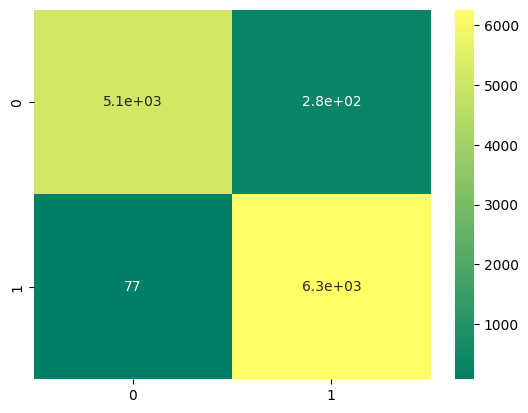

In [13]:
#confusion matrix and classification report
y_act=y_test
y_pred=VotingClassifiers.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

### Model 2: Decision Tree classifier
The function of the Decision Tree Classifier is to learn a decision tree from the given training data that can be used to classify new data. This is achieved by the algorithm determining the best feature partitioning based on certain criteria in order to divide the data into subgroups that are as homogeneous as possible. During training, the decision tree learns how to optimally use the features to classify the data.

In [14]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test,y_test))

0.9612391772914917
0.9561029662461643


In [15]:
Decision_Tree_classifier = (model2.score(x_train,y_train),(model2.score(x_test,y_test)))
Decision_Tree_classifier

(0.9612391772914917, 0.9561029662461643)

              precision    recall  f1-score   support

        Fake       0.98      0.93      0.95      5392
        Real       0.94      0.98      0.96      6340

    accuracy                           0.96     11732
   macro avg       0.96      0.95      0.96     11732
weighted avg       0.96      0.96      0.96     11732



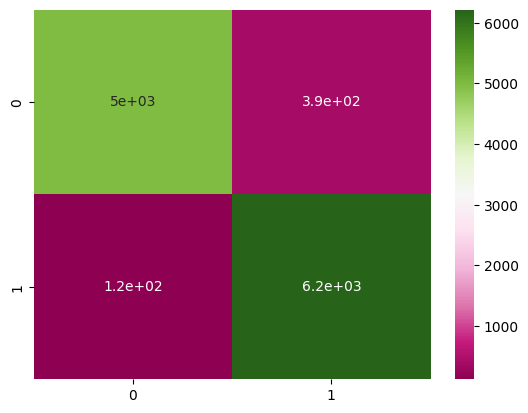

In [16]:
#confusion matrix and classification report
y_act=y_test
y_pred=model2.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

### Model 3: RandomizedSearchCV RandomForest
The function of RandomizedSearchCV is to evaluate a given number of random combinations of hyperparameters and evaluate the performance of the RandomForest model using these settings. This involves cross-validation, where the training data is split into multiple parts and different combinations of hyperparameters are trained on the partial datasets and tested on a validation dataset. This allows for a robust evaluation of the model's performance.

In [17]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(x_train, y_train)
print('Training score:',classifiers.score(x_train, y_train))
print('Testing score:',classifiers.score(x_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.9944105505425054
Testing score: 0.9942038868053188
RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=5)


In [18]:
Random_forest = (classifiers.score(x_train,y_train),(classifiers.score(x_test,y_test)))
Random_forest

(0.9944105505425054, 0.9942038868053188)

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      5392
        Real       0.99      1.00      0.99      6340

    accuracy                           0.99     11732
   macro avg       0.99      0.99      0.99     11732
weighted avg       0.99      0.99      0.99     11732



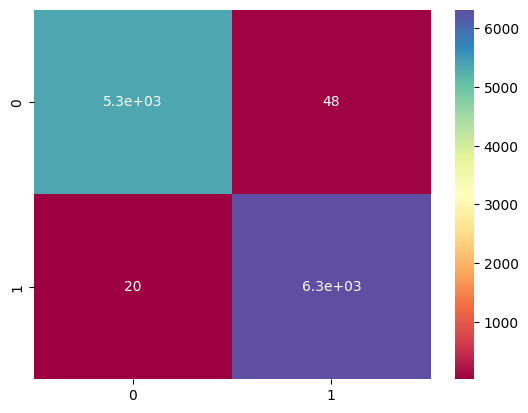

In [19]:
#confusion matrix and classification report
y_act=y_test
y_pred=classifiers.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

### Model 4: GradientBoosting Classifier
The GradientBoosting Classifier is a machine learning algorithm used to classify data. It is based on the idea of gradient boosting, where weak learning algorithms, in this case decision trees, are combined into a strong learning algorithm.

In [20]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=8,n_jobs=-1)
model3.fit(x_train,y_train)
print('Training score:',model3.score(x_train,y_train))
print('Testing score:',model3.score(x_test,y_test))
model3.best_params_

Training score: 0.9999634676506046
Testing score: 0.9903682236617798


{'n_estimators': 10, 'max_features': 6, 'max_depth': 200, 'learning_rate': 3}

In [21]:
Graident_boost = (model3.score(x_train,y_train),(model3.score(x_test,y_test)))
Graident_boost

(0.9999634676506046, 0.9903682236617798)

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5392
        Real       0.99      0.99      0.99      6340

    accuracy                           0.99     11732
   macro avg       0.99      0.99      0.99     11732
weighted avg       0.99      0.99      0.99     11732



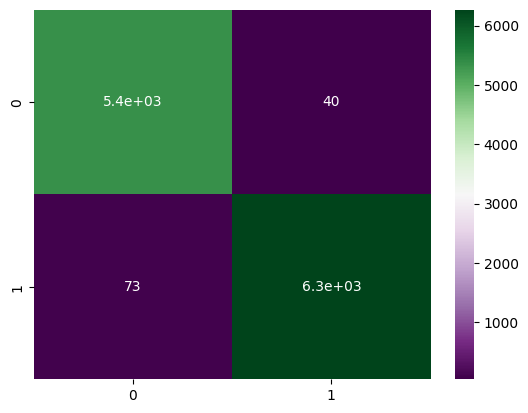

In [22]:
#confusion matrix and classification report
y_act=y_test
y_pred=model3.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn')
print(classification_report(y_act,y_pred))

### Model 5: XGBoost classifier
The function of the XGBoost Classifier is to create an ensemble classifier consisting of a sequence of decision trees. Similar to the GradientBoosting Classifier, the XGBoost Classifier focuses on improving the errors of the previous tree. However, it uses an improved method to calculate the weights of the decision trees and optimise the model performance.

In [23]:
model = XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)
model.fit(x_train,y_train.replace({"Real":0,'Fake':1}))
print('Training score:',model.score(x_train,y_train.replace({"Real":0,'Fake':1})))
print('Testing score:',model.score(x_test,y_test.replace({"Real":0,'Fake':1})))

Training score: 0.9964198297592518
Testing score: 0.9860211387657688


In [24]:
XGboost_classifier = (model.score(x_train,y_train.replace({"Real":0,'Fake':1})),model.score(x_test,y_test.replace({"Real":0,'Fake':1})))
XGboost_classifier

(0.9964198297592518, 0.9860211387657688)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6340
           1       0.98      0.99      0.98      5392

    accuracy                           0.99     11732
   macro avg       0.99      0.99      0.99     11732
weighted avg       0.99      0.99      0.99     11732



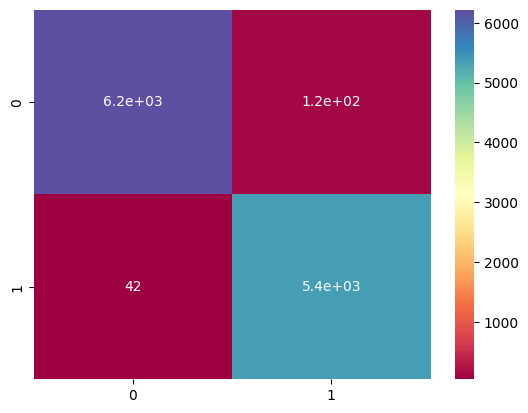

In [25]:
#confusion matrix and classification report
y_act = y_test.replace({"Real":0,'Fake':1})
y_pred = model.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

### Model 6: Ada_Boost(Random Forest)
The function of the AdaBoost algorithm is to create a sequence of decision trees, each tree based on the errors of the previous tree. The algorithm adjusts the weight of each training example to focus on the examples that were previously misclassified. By iteratively combining the decision trees, a strong classifier is generated.

In [26]:
RandomForest = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                        n_estimators=5)
AddaBoosts = AdaBoostClassifier(base_estimator =RandomForest,n_estimators=70,learning_rate=2.38,random_state=1)
AddaBoosts.fit(x_train,y_train)
print('Training score:',AddaBoosts.score(x_train,y_train))
print('Testing score:',AddaBoosts.score(x_test,y_test))

Training score: 0.9923647389763636
Testing score: 0.9825264234572111


In [27]:
ab_rf = (AddaBoosts.score(x_train,y_train),(AddaBoosts.score(x_test,y_test)))
ab_rf

(0.9923647389763636, 0.9825264234572111)

              precision    recall  f1-score   support

        Fake       0.97      0.99      0.98      5392
        Real       0.99      0.97      0.98      6340

    accuracy                           0.98     11732
   macro avg       0.98      0.98      0.98     11732
weighted avg       0.98      0.98      0.98     11732



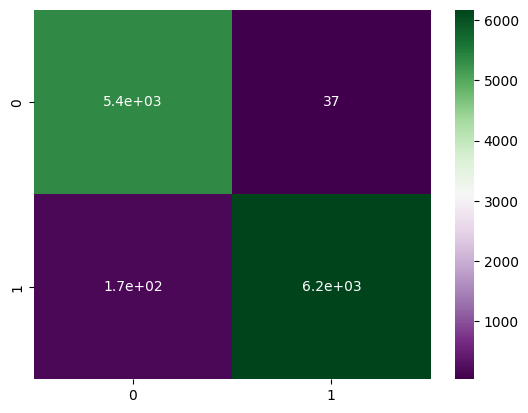

In [28]:
#confusion matrix and classification report
y_act = y_test
y_pred = AddaBoosts.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn')
print(classification_report(y_act,y_pred))

### Model 7: AddaBoost(Decision Tree)
Typically, the AdaBoost algorithm (Adaptive Boosting) is combined with various weak learning algorithms such as decision trees, linear models or other classifiers to create an ensemble model. The algorithm adjusts the weight of each training example to focus on the misclassified examples and iteratively improve the prediction accuracy.

In [29]:
Decision_tree = DecisionTreeClassifier(max_depth=200, min_samples_leaf=13, random_state=1)
AdaBoost = AdaBoostClassifier(base_estimator = Decision_tree,n_estimators=70,learning_rate=2,random_state=1)
AdaBoost.fit(x_train, y_train)
print('Training score:',AdaBoost.score(x_train, y_train))
print('Testing score:',AdaBoost.score(x_test,y_test))

Training score: 0.9807109195192343
Testing score: 0.9728946471189908


In [30]:
Adaboost_DT = (AdaBoost.score(x_train,y_train),(AdaBoost.score(x_test,y_test)))
Adaboost_DT

(0.9807109195192343, 0.9728946471189908)

              precision    recall  f1-score   support

        Fake       1.00      0.95      0.97      5392
        Real       0.96      1.00      0.98      6340

    accuracy                           0.97     11732
   macro avg       0.98      0.97      0.97     11732
weighted avg       0.97      0.97      0.97     11732



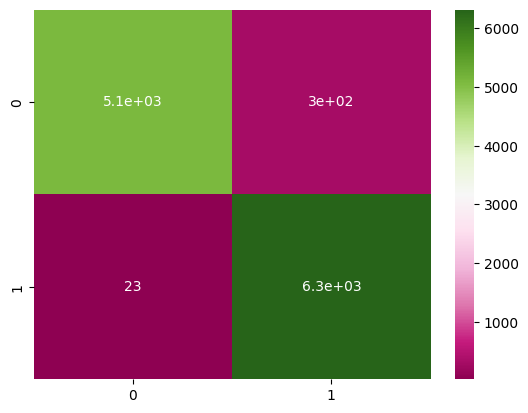

In [31]:
#confusion matrix and classification report
y_act = y_test
y_pred = AdaBoost.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

### Model 8: RandomizedSearch_KNeighborsClassifier
The KNeighborsClassifier is a classification algorithm based on the concept of k-nearest neighbours. It assigns a class to a test data point by looking at the k nearest training data points and selecting the most frequent class among them.

In [32]:
model = RandomizedSearchCV(KNeighborsClassifier(),{'n_neighbors':[10],'metric':['manhattan','minkowski','cosine','tanimoto'],
                                                   'p':[1,2]},random_state=8,n_jobs=-1)
model.fit(x_train, y_train)
print('Training score:',model.score(x_train, y_train))
print('Testing score:',model.score(x_test,y_test))
print(model.best_estimator_)

Training score: 0.9899901362656632
Testing score: 0.9855097170132969
KNeighborsClassifier(metric='manhattan', n_neighbors=10, p=1)


In [33]:
RandomizedSearch_KNeighborsClassifier = (model.score(x_train,y_train),(model.score(x_test,y_test)))
RandomizedSearch_KNeighborsClassifier

(0.9899901362656632, 0.9855097170132969)

              precision    recall  f1-score   support

        Fake       0.98      0.99      0.98      5392
        Real       0.99      0.98      0.99      6340

    accuracy                           0.99     11732
   macro avg       0.99      0.99      0.99     11732
weighted avg       0.99      0.99      0.99     11732



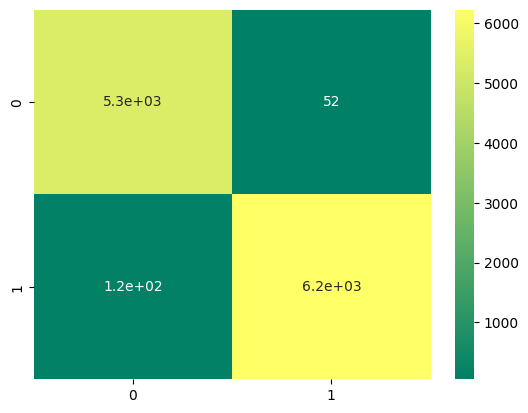

In [34]:
#confusion matrix and classification report
y_act = y_test
y_pred = model.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

## Accuracy DataFrame
Now let's compare the accuracy of the different models. For this I will create a dataframe with the accuracy of the different models.

In [35]:
score_data = {'votingclassifier_NB': votingclassifier,
              'DecisionTreeClassifier': Decision_Tree_classifier,
              'Random_forest RandomSearchCV': Random_forest,
              'Graident_boost RandomSearchCV': Graident_boost,
              'RandomizedSearch_KNeighborsClassifier':RandomizedSearch_KNeighborsClassifier,
              'Addaboost(Decision Tree)':Adaboost_DT,
              'XGboost_classifier':XGboost_classifier,
              'AddaBoost(Random Forest)':ab_rf}
score_df = pd.DataFrame(score_data).T
score_df.rename(columns = {0:'Train score',1:'Test score'}, inplace = True)
score_df

,Train score,Test score
votingclassifier_NB,0.971103,0.969826
DecisionTreeClassifier,0.961239,0.956103
Random_forest RandomSearchCV,0.994411,0.994204
Graident_boost RandomSearchCV,0.999963,0.990368
RandomizedSearch_KNeighborsClassifier,0.989990,0.985510
Addaboost(Decision Tree),0.980711,0.972895
XGboost_classifier,0.996420,0.986021
AddaBoost(Random Forest),0.992365,0.982526


## Conclusion
VotingClassifier_NB, Adaboost(Decision tree) & AddaBoost(Random Forest) fits best based on this dataset. So let's check which one I will use to create the model in the next notebook "03_model_training".